### Introduction

* Dataset available in scikit-learn
* contains metrics such as population, median income, median housing price, etc.
* sample data are for different block groups which can be treated as districts


### Machine Learning project checklist

* Frame the problem and look at the big picture
* Get the data (scikit-learn)
* Explore the data to gain insights (pandas, matplotlib)
* Prepare the data to better expose the underlying data patterns to Machine Learning algorithms
* Explore different models and short-list the best ones
* Fine-tune your models, adjust parameters and combine them into a solution
* Launch, monitor, maintain the deployed solution

# Frame the problem

Determine whether it is worth investing in a given area or not via predicted housing prices

* Supervised or unsupervised or mixed?
* Classification or Regression or something else?
* Batch learning or online learning?
* Which performance measure?
* Prices into categories like cheap, moderately expensive, expensive?

# Get the Data

May need to deal with relational database, documents, authorization, download, conversions

* http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

* http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

* https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv

Optional exercise: write a function to automate retrieving the dataset

In [126]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

pd.options.display.max_rows = 14

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [127]:
housing = pd.read_csv('housing.csv')
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

# Explore the data

In [128]:
housing.info()
#housing.isnull().any(axis=1)
housing[housing.isnull().any(axis=1)]
#housing.loc[:, housing.isnull().any(axis=0)]
#housing.loc[housing.isnull().any(axis=1), housing.isnull().any(axis=0)]
# How to deal with these missing values?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
738      -122.14     37.67                37.0       3342.0             NaN   
1097     -121.77     39.66                20.0       3759.0             NaN   
...          ...       ...                 ...          ...             ...   
20069    -120.37     38.01                30.0        473.0             NaN   
20125    -118.80     34.41                45.0       1610.0             NaN   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
738        1635.0       557.0         4.7933            186900.0   
1097       1705.0       600.0         4.7120            158600.0   
...           ...         ...            ...                 ...   
20069       242.0        93.0         2.5417            123200.0   
20125      1148.0       347.0         2.7000            120400.0   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity  
290          NEAR BAY  
341          NEAR BAY  
538          NEAR BAY  
563          NEAR BAY  
696          NEAR BAY  
738          NEAR BAY  
1097           INLAND  
...               ...  
20069          INLAND  
20125       <1H OCEAN  
20267      NEAR OCEAN  
20268      NEAR OCEAN  
20372       <1H OCEAN  
20460       <1H OCEAN  
20484       <1H OCEAN  

[207 rows x 10 columns]

In [129]:
housing['ocean_proximity'].unique()
housing['ocean_proximity'].value_counts()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype=object)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [130]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [131]:
#x = housing.hist(bins=50, figsize=(20, 15))
#plt.show()

# median income attribute is scaled between 0 to 15?
# max median age 52?
# max median house value $500,000?
# different scales
# positively skewed

In [132]:
# Split the dataset into training and test sets
# 1. Randomised split (works for large datasets)
import sklearn.model_selection as ms
# `random_state` is the seed; use it so that the dataset is split in the same way on every single run
rn_train_set, rn_test_set = ms.train_test_split(housing, test_size = 0.2, random_state=42)  
rn_train_set.shape
rn_test_set.shape

(16512, 10)

(4128, 10)

In [133]:
# 1. Categorised split (might be needed for small datasets)
housing['median_income'].min(), housing['median_income'].max()
# can compute n = (max - min) / (splits + 1), we just use n = 1.5 below
income_categories = housing['median_income'] // 1.5
income_categories.min(), income_categories.max(), income_categories.shape
income_categories.unique().size

# Or use np.ceil or np.floor
# income_categories2 = np.floor(housing['median_income'] / 1.5)
# income_categories2.min(), income_categories2.max(), income_categories2.shape
# income_categories2.unique().size

(0.49990000000000001, 15.0001)

(0.0, 10.0, (20640,))

11

In [134]:
# housing['income_category'] = income_categories

housing.groupby(income_categories).size()
#x = income_categories.plot(kind='hist')
# Too few values from 5-10 income categories, so let us put them in one category
# i.e. if income_category of a row is greater than or equal to 5, assign category 5 to it
# why does this cause no problems?

median_income
0.0      815
1.0     6550
2.0     7250
3.0     3652
4.0     1423
5.0      543
6.0      189
7.0      105
8.0       50
9.0       12
10.0      51
dtype: int64

In [135]:
income_categories[income_categories >= 5] = 5
income_categories.shape
income_categories.value_counts()
#x = income_categories.plot(kind='hist')

(20640,)

2.0    7250
1.0    6550
3.0    3652
4.0    1423
5.0     950
0.0     815
Name: median_income, dtype: int64

In [136]:
split = ms.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#split.split?

In [137]:
for training_indices, test_indices in split.split(housing, income_categories):
    stratified_train_set = housing.loc[training_indices]
    stratified_test_set = housing.loc[test_indices]
### TODO: Convert this into a function    
stratified_train_set.shape
stratified_test_set.shape

(16512, 10)

(4128, 10)

In [138]:
h = housing.groupby(income_categories).size() / len(housing)
h.name = 'housing'
#str_train = stratified_train_set.groupby(income_categories).size() / len(stratified_train_set)
#str_train.name = 'stratified train'
str_test = stratified_test_set.groupby(income_categories).size() / len(stratified_test_set)
str_test.name = 'stratified test'

#rn_train = rn_train_set.groupby(income_categories).size() / len(rn_train_set)
#rn_train.name = 'random train'
rn_test = rn_test_set.groupby(income_categories).size() / len(rn_test_set)
rn_test.name = 'random test'

compare = pd.concat([h, str_test, rn_test], axis=1)
compare['stratified test %'] = 100 * (compare['stratified test'] - compare['housing']) / compare['housing']
compare['random test %'] = 100 * (compare['random test'] - compare['housing']) / compare['housing']
compare

housing  stratified test  random test  stratified test %  \
median_income                                                              
0.0            0.039486         0.039486     0.039971           0.000000   
1.0            0.317345         0.317345     0.322674           0.000000   
2.0            0.351260         0.351260     0.359254           0.000000   
3.0            0.176938         0.176841     0.168605          -0.054765   
4.0            0.068944         0.069041     0.064438           0.140548   
5.0            0.046027         0.046027     0.045058           0.000000   

               random test %  
median_income                 
0.0                 1.226994  
1.0                 1.679389  
2.0                 2.275862  
3.0                -4.709748  
4.0                -6.535488  
5.0                -2.105263

In [139]:
housing = stratified_train_set.copy()
#x = housing.plot(kind='scatter', x='longitude', y='latitude')

In [140]:
#x = housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

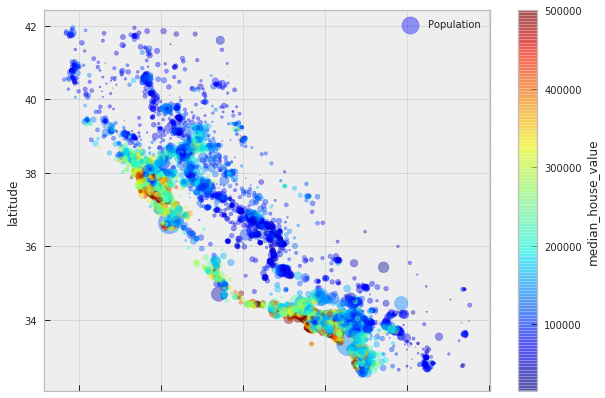

In [141]:
x = housing.plot(kind='scatter', 
             x='longitude', 
             y='latitude', 
             alpha=0.4, 
             s=housing['population']/60, 
             label='Population',
             figsize=(10,7),
             c='median_house_value',
             cmap=plt.get_cmap('jet'),
             colorbar=True)
x = plt.legend()

In [142]:
corr_matrix = housing.corr()
corr_matrix = np.abs(corr_matrix)
corr_matrix = corr_matrix.median_house_value.sort_values(ascending=False)
corr_matrix

median_house_value    1.000000
median_income         0.685916
latitude              0.142955
total_rooms           0.129694
housing_median_age    0.105802
households            0.061859
longitude             0.047490
total_bedrooms        0.046865
population            0.030821
Name: median_house_value, dtype: float64

In [143]:
corr_columns = corr_matrix.index[:5]
housing[corr_columns].head()
#x = pd.plotting.scatter_matrix(housing[correlated_columns], alpha=0.4, figsize=(12, 8), diagonal='kde')

median_house_value  median_income  latitude  total_rooms  \
3153              85500.0         3.2405     35.12       4084.0   
2579             143000.0         3.5156     40.85       2414.0   
16718            171300.0         2.8285     35.49       4422.0   
5373             309100.0         2.0437     34.04       3005.0   
20311            243800.0         2.0368     34.17        470.0   

       housing_median_age  
3153                 16.0  
2579                 31.0  
16718                17.0  
5373                 36.0  
20311                37.0

In [144]:
import seaborn as sns
sns.set(style='ticks')
#x = sns.pairplot(housing[correlated_columns])

In [145]:
income_categories.name = 'income_categories'
# x = sns.pairplot(pd.concat([housing[corr_columns], income_categories], axis=1, join='inner'), hue='income_categories')

In [146]:
#x = sns.lmplot('median_income', 'median_house_value', data=housing, fit_reg=False)

# Prepare the data
Should some attributes be dropped or combined together?

In [147]:
housing['rooms_per_household'] = housing.total_rooms / housing.households
housing['bedrooms_per_household'] = housing.total_bedrooms / housing.households
housing['bedrooms_per_room'] = housing.total_bedrooms / housing.total_rooms
housing['population_per_household'] = housing.population / housing.households

### TODO: Convert this into a function

housing.head()

corr_matrix2 = housing.corr()
corr_matrix2 = np.abs(corr_matrix2)
corr_matrix2.median_house_value.sort_values(ascending=False)

# You can come back and iterate this step many times

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3153     -118.46     35.12                16.0       4084.0           812.0   
2579     -124.05     40.85                31.0       2414.0           428.0   
16718    -120.66     35.49                17.0       4422.0           945.0   
5373     -118.38     34.04                36.0       3005.0           771.0   
20311    -119.11     34.17                37.0        470.0           105.0   

       population  households  median_income  median_house_value  \
3153       2033.0       668.0         3.2405             85500.0   
2579       1005.0       401.0         3.5156            143000.0   
16718      2307.0       885.0         2.8285            171300.0   
5373       2054.0       758.0         2.0437            309100.0   
20311       522.0        83.0         2.0368            243800.0   

      ocean_proximity  rooms_per_household  bedrooms_per_household  \
3153           INLAND             6.113772                1.215569   
2579       NEAR OCEAN             6.019950                1.067332   
16718       <1H OCEAN             4.996610                1.067797   
5373        <1H OCEAN             3.964380                1.017150   
20311      NEAR OCEAN             5.662651                1.265060   

       bedrooms_per_room  population_per_household  
3153            0.198825                  3.043413  
2579            0.177299                  2.506234  
16718           0.213704                  2.606780  
5373            0.256572                  2.709763  
20311           0.223404                  6.289157

median_house_value          1.000000
median_income               0.685916
bedrooms_per_room           0.249257
rooms_per_household         0.154070
latitude                    0.142955
total_rooms                 0.129694
housing_median_age          0.105802
households                  0.061859
longitude                   0.047490
total_bedrooms              0.046865
bedrooms_per_household      0.042540
population                  0.030821
population_per_household    0.022350
Name: median_house_value, dtype: float64

## Transform the data
Always create functions to transform the data, this will you help with:
reproduce transformations easily on new data recieved in future for further training
use the functions in production system to transform non-training data
make it easy to try various transformations and select the best one.

## Step 1: Split the training data set into features and labels

In [148]:
housing_features = stratified_train_set.drop('median_house_value', axis=1)
housing_features.head()
housing_labels = stratified_train_set.median_house_value.copy()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3153     -118.46     35.12                16.0       4084.0           812.0   
2579     -124.05     40.85                31.0       2414.0           428.0   
16718    -120.66     35.49                17.0       4422.0           945.0   
5373     -118.38     34.04                36.0       3005.0           771.0   
20311    -119.11     34.17                37.0        470.0           105.0   

       population  households  median_income ocean_proximity  
3153       2033.0       668.0         3.2405          INLAND  
2579       1005.0       401.0         3.5156      NEAR OCEAN  
16718      2307.0       885.0         2.8285       <1H OCEAN  
5373       2054.0       758.0         2.0437       <1H OCEAN  
20311       522.0        83.0         2.0368      NEAR OCEAN

## Step 2: Data Cleaning. Handle NaNs in total_bedrooms column
Drop corresponding observations? Drop whole column? Set the NaN values to mean/median?

In [149]:
### A. Manual method
# housing_features.dropna(subset=['total_bedrooms'])  # 1. drop rows
# housing_features.drop('total_bedrooms', axis=1)     # 2. drop column
median = housing_features['total_bedrooms'].median() 
median
housing_features.head()
# Always save computed median in a variable. You need it to replace NaN values in total_bedroom 
# column in future data. Always save and use this value instead of computing it again later
# because the model has been trained with this median value

433.0

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3153     -118.46     35.12                16.0       4084.0           812.0   
2579     -124.05     40.85                31.0       2414.0           428.0   
16718    -120.66     35.49                17.0       4422.0           945.0   
5373     -118.38     34.04                36.0       3005.0           771.0   
20311    -119.11     34.17                37.0        470.0           105.0   

       population  households  median_income ocean_proximity  
3153       2033.0       668.0         3.2405          INLAND  
2579       1005.0       401.0         3.5156      NEAR OCEAN  
16718      2307.0       885.0         2.8285       <1H OCEAN  
5373       2054.0       758.0         2.0437       <1H OCEAN  
20311       522.0        83.0         2.0368      NEAR OCEAN

In [150]:
#nan_indices = housing_features.loc[housing_features.isnull().any(axis=1)].index
#nan_indices
housing2 = housing_features.fillna(median) # 3. replace NaNs with median
#housing2.head()
#housing2.loc[nan_indices]
#housing2.isnull().any()

In [151]:
### B. Imputer method
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
# how to save median value now to be used in future data?

housing_numeric = housing_features.drop('ocean_proximity', axis=1)

imputer.fit(housing_numeric)  # can use imputer.fit_transform()
imputer.statistics_
housing_numeric.median().values

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

array([ -118.52  ,    34.26  ,    29.    ,  2127.    ,   433.    ,
        1162.    ,   409.    ,     3.5417])

array([ -118.52  ,    34.26  ,    29.    ,  2127.    ,   433.    ,
        1162.    ,   409.    ,     3.5417])

In [152]:
# what's the state of the dataframe before transform:
housing_numeric[housing_numeric.isnull().any(axis=1)]
housing_numeric[housing_numeric['total_bedrooms'] == 433]
housing_numeric.isnull().any()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3354     -120.67     40.50                15.0       5343.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
4743     -118.36     34.05                42.0       1372.0             NaN   
19959    -119.32     36.25                21.0       1231.0             NaN   
10236    -117.92     33.87                33.0       1597.0             NaN   
7228     -118.16     34.01                40.0       1552.0             NaN   
19060    -122.41     38.16                37.0       1549.0             NaN   
...          ...       ...                 ...          ...             ...   
2301     -119.78     36.82                25.0       5016.0             NaN   
13069    -121.30     38.58                16.0       1537.0             NaN   
2578     -124.06     40.86                34.0       4183.0             NaN   
4600     -118.27     34.04                13.0       1784.0             NaN   
14970    -117.01     32.74                31.0       3473.0             NaN   
10385    -117.65     33.60                15.0       5736.0             NaN   
1456     -121.98     37.96                22.0       2987.0             NaN   

       population  households  median_income  
3354       2503.0       902.0         3.5962  
20268      1938.0       762.0         1.6953  
4743        674.0       271.0         2.8793  
19959       609.0       206.0         2.8365  
10236      1888.0       423.0         3.0550  
7228       1919.0       427.0         2.2596  
19060       863.0       275.0         2.7457  
...           ...         ...            ...  
2301       2133.0       928.0         3.6250  
13069      1125.0       375.0         2.6471  
2578       1891.0       669.0         3.2216  
4600       2158.0       682.0         1.7038  
14970      2098.0       677.0         2.6973  
10385      2529.0       762.0         6.4114  
1456       1420.0       540.0         3.6500  

[153 rows x 8 columns]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16074    -122.49     37.74                52.0       2189.0           433.0   
4814     -118.28     34.04                39.0       1155.0           433.0   
5750     -118.28     34.17                52.0       2332.0           433.0   
17095    -122.24     37.47                36.0       2021.0           433.0   
3195     -119.73     36.31                20.0       2440.0           433.0   
2875     -118.97     35.39                38.0       2121.0           433.0   
4990     -118.31     33.99                48.0       2235.0           433.0   
...          ...       ...                 ...          ...             ...   
18113    -122.02     37.31                34.0       2629.0           433.0   
16346    -121.34     38.03                12.0       2707.0           433.0   
17194    -119.79     34.45                24.0       2746.0           433.0   
18368    -121.98     37.16                42.0       2533.0           433.0   
5035     -118.34     33.99                48.0       2225.0           433.0   
16781    -122.48     37.67                31.0       2609.0           433.0   
5279     -118.47     34.06                45.0       3030.0           433.0   

       population  households  median_income  
16074      1147.0       420.0         3.4583  
4814       1857.0       424.0         2.1696  
5750       1135.0       440.0         5.5658  
17095      1117.0       432.0         3.9290  
3195       1579.0       400.0         2.8281  
2875       1547.0       441.0         2.7740  
4990       1363.0       433.0         1.6559  
...           ...         ...            ...  
18113      1301.0       431.0         6.0830  
16346      1200.0       380.0         4.9861  
17194      1076.0       380.0         5.8635  
18368       957.0       398.0         5.3468  
5035       1170.0       401.0         2.9643  
16781      1746.0       464.0         5.1054  
5279        916.0       399.0         9.4664  

[26 rows x 8 columns]

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
dtype: bool

In [153]:
# transform:
X = imputer.transform(housing_numeric)
housing_features_tr = pd.DataFrame(X, columns=housing_numeric.columns)
### TODO: Convert this into a function

housing_features_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -118.46     35.12                16.0       4084.0           812.0   
1    -124.05     40.85                31.0       2414.0           428.0   
2    -120.66     35.49                17.0       4422.0           945.0   
3    -118.38     34.04                36.0       3005.0           771.0   
4    -119.11     34.17                37.0        470.0           105.0   

   population  households  median_income  
0      2033.0       668.0         3.2405  
1      1005.0       401.0         3.5156  
2      2307.0       885.0         2.8285  
3      2054.0       758.0         2.0437  
4       522.0        83.0         2.0368

In [154]:
# verify if transformation worked correctly:
housing_features_tr.isnull().any()
housing_features_tr[housing_features_tr['total_bedrooms'] == 433]

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
dtype: bool

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
27       -122.49     37.74                52.0       2189.0           433.0   
118      -120.67     40.50                15.0       5343.0           433.0   
141      -119.18     34.19                19.0       2393.0           433.0   
160      -118.36     34.05                42.0       1372.0           433.0   
162      -119.32     36.25                21.0       1231.0           433.0   
189      -117.92     33.87                33.0       1597.0           433.0   
224      -118.16     34.01                40.0       1552.0           433.0   
...          ...       ...                 ...          ...             ...   
15714    -122.48     37.67                31.0       2609.0           433.0   
15761    -124.06     40.86                34.0       4183.0           433.0   
15914    -118.47     34.06                45.0       3030.0           433.0   
15959    -118.27     34.04                13.0       1784.0           433.0   
15968    -117.01     32.74                31.0       3473.0           433.0   
16393    -117.65     33.60                15.0       5736.0           433.0   
16498    -121.98     37.96                22.0       2987.0           433.0   

       population  households  median_income  
27         1147.0       420.0         3.4583  
118        2503.0       902.0         3.5962  
141        1938.0       762.0         1.6953  
160         674.0       271.0         2.8793  
162         609.0       206.0         2.8365  
189        1888.0       423.0         3.0550  
224        1919.0       427.0         2.2596  
...           ...         ...            ...  
15714      1746.0       464.0         5.1054  
15761      1891.0       669.0         3.2216  
15914       916.0       399.0         9.4664  
15959      2158.0       682.0         1.7038  
15968      2098.0       677.0         2.6973  
16393      2529.0       762.0         6.4114  
16498      1420.0       540.0         3.6500  

[179 rows x 8 columns]

### Feature scaling: Min-max or Standardisation
Min-max scaling: 
* (value - min) / (max - min)
* scaled values range from 0 to 1
* sensitive to outliers
* MinMaxScaler()

Standardisation:
* (value - mean) / variance
* not as sensitive to outliers
* range not between 0 and 1 which could be problematic for some models(neural networks)
* StandardScaler()

### Numeric representation of categorical data:
* factorize() in pandas maps each category to a sequential number
* OneHotEncoder in Scikit-Learn converts integer values into one-hot vectors in
  the form of a sparse matrix
* CategoricalEncoder works directly on categorical data

In [155]:
housing_categorical = housing_features['ocean_proximity']
housing_categorical.head(10)

3153         INLAND
2579     NEAR OCEAN
16718     <1H OCEAN
5373      <1H OCEAN
20311    NEAR OCEAN
1727       NEAR BAY
1553      <1H OCEAN
2098         INLAND
9390       NEAR BAY
5573      <1H OCEAN
Name: ocean_proximity, dtype: object

In [156]:
housing_cat_encoded, housing_cat_names = housing_categorical.factorize()
housing_cat_encoded[:10]
housing_cat_names

array([0, 1, 2, 2, 1, 3, 2, 0, 3, 2])

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [157]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
housing_1hot_ohe = ohe.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_1hot_ohe

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [158]:
# How to handle categorical data: http://scikit-learn.org/dev/modules/preprocessing.html#preprocessing-categorical-features
# http://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.CategoricalEncoder.html
# Pull request: https://github.com/scikit-learn/scikit-learn/commit/a2ebb8cfd2d126ad8e6fb36e0bdadba7de8fcd9f
# New features in dev version: http://scikit-learn.org/dev/whats_new.html
# Code for CategoricalEncoder: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/preprocessing/data.py

# from sklearn.preprocessing import CategoricalEncoder

%run 'CategoricalEncoder.py'

enc = CategoricalEncoder()
housing_1hot = enc.fit_transform(housing_categorical.values.reshape(-1, 1))
housing_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## Write all the transformation functions/classes

In [159]:
# Create the following using FunctionTransformer?
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column_names):
        self.column_names = column_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.column_names].values

rooms_col, bedrooms_col, population_col, households_col = 3, 4, 5, 6

class AttributeAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rph = X[:, rooms_col] / X[:, households_col]
        bph = X[:, bedrooms_col] / X[:, households_col]
        bpr = X[:, bedrooms_col] / X[:, rooms_col]
        pph = X[:, population_col] / X[:, households_col]
        return np.c_[X, rph, bph, bpr, pph]

# attribute_adder = AttributeAdder()
# housing_full = attribute_adder.transform(housing.values)

In [160]:
# housing_features = stratified_train_set.drop('median_house_value', axis=1)
# housing_numeric = housing_features.drop('ocean_proximity', axis=1)
numeric_cols = list(housing_numeric)
categorical_cols = ['ocean_proximity']

# use `make_pipeline` to make this code simpler; estimator names can be skipped: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html
numeric_cols_pipeline = Pipeline([('selector', ColumnSelector(numeric_cols)),
                                  ('imputer', Imputer(strategy='median')),
                                  ('attributes_adder', AttributeAdder()),
                                  ('standard_scaler', StandardScaler())
                                 ])

categorical_cols_pipeline = Pipeline([('selector', ColumnSelector(categorical_cols)),
                                      ('encoder', CategoricalEncoder(encoding='onehot-dense'))
                                     ])

full_pipeline = FeatureUnion(transformer_list=[('numeric_pipeline', numeric_cols_pipeline),
                                               ('categorical_pipeline', categorical_cols_pipeline)
                                              ])

# housing_numeric_transformed = numeric_cols_pipeline.fit_transform(housing_numeric)
# housing_categorical_transformed = categorical_cols_pipeline.fit_transform(housing.ocean_proximity)

housing_transformed = full_pipeline.fit_transform(housing)
housing_transformed.shape
housing_transformed

(16512, 17)

array([[ 0.55770877, -0.24384572, -1.00717954, ...,  0.        ,
         0.        ,  0.        ],
       [-2.23455235,  2.43896586,  0.18778414, ...,  0.        ,
         0.        ,  1.        ],
       [-0.54121332, -0.07061006, -0.92751529, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.62764017, -0.74014245,  1.8607333 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.70256668, -0.75887063,  0.42677688, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58767937, -0.67927587,  0.1081199 , ...,  0.        ,
         0.        ,  0.        ]])

In [161]:
# Assignments:
# Try alternative strategies
# Fix errors
# Use Seaborn for plots

# Explore different models
## A. Linear Regression

In [162]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_transformed, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [163]:
sample_feature_data = housing.iloc[:5]
sample_label_data = housing_labels.iloc[:5]

sample_transformed = full_pipeline.transform(sample_feature_data)
lin_reg.predict(sample_transformed)
list(sample_label_data)

array([ 124620.61023849,  196927.40669429,  211628.69692518,
        174554.79822657,  167205.35543742])

[85500.0, 143000.0, 171300.0, 309100.0, 243800.0]

In [164]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_transformed)
train_mse = mean_squared_error(housing_labels, housing_predictions)
np.sqrt(train_mse) # 0 is best performance, error is in the same unit of the predicted value/label
housing.median_house_value.min(), housing.median_house_value.max()

67997.592882691926

(14999.0, 500001.0)

In [165]:
from sklearn.metrics import r2_score
r2_score(housing_labels, housing_predictions) # 1 is best performance, 0 is constant y irrespective of X, -1 is worst performance

0.65158541863086272

### What does this error mean?
* compared to range of housing median value, an error of 68k is quite large and represents under-fitting the training data. 
* if training error is this high, test error is going to be even larger(but don't be tempted to test the model on test set yet)
* it means that 
  * the features do not provide enough information to make good predictions(part of it could be irreducible error 
    but we can also try to fix the scaling problem and the horizontal lines we noticed earlier)
  * the model is not flexible enough(reducible error)
  * too many constraints on the model(doesn't apply in this case as this model is not regularised)

## B. DecisionTreeRegressor
DecisionTreeRegressor is capable of finding complex non-linear relationships in the training data, it's more flexible than LinearRegressor.

In [166]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
x = dt_reg.fit(housing_transformed, housing_labels)

housing_predictions2 = dt_reg.predict(housing_transformed)
train_mse2 = mean_squared_error(housing_labels, housing_predictions2)
np.sqrt(train_mse2)
r2_score(housing_labels, housing_predictions2)

0.0

1.0

### What does this error mean?
Perfect results almost always means something is terribly wrong. In this case, extreme over-fitting of the data is the most likely suspect. 
Resist the temptation to try it on test data just yet. Instead, use cross-validation using training set for now.

In [167]:
from sklearn.model_selection import cross_val_score

scores2 = cross_val_score(dt_reg, housing_transformed, housing_labels, scoring='neg_mean_squared_error', cv=10)
train_mse22_scores = np.sqrt(-scores2)

In [168]:
print(train_mse22_scores)
print(train_mse22_scores.mean())
print(train_mse22_scores.std()) # explain standard deviation if not covered already

# come back to reality; DecisionTreeRegressor as bad or worse than LinearRegression
# Exercise: do cross-validation for linear regression

[ 71086.38303977  74226.08544807  72579.54580048  71373.33552545
  68471.40139768  72345.20400653  73077.80155413  71965.92330527
  77834.65965994  65715.57446199]
71867.5914199
3059.63499055


## RandomForestRegressor

In [169]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
x = rf_reg.fit(housing_transformed, housing_labels)

housing_predictions3 = rf_reg.predict(housing_transformed)
train_mse3 = mean_squared_error(housing_labels, housing_predictions3)
np.sqrt(train_mse3)
r2_score(housing_labels, housing_predictions3)

22394.604712885015

0.96220833322680677

### What does this error mean?
Just do the cross-validation.

In [124]:
scores3 = cross_val_score(rf_reg, housing_transformed, housing_labels, scoring='neg_mean_squared_error', cv=10)
train_mse33_scores = np.sqrt(-scores3)

print(train_mse33_scores)
print(train_mse33_scores.mean())
print(train_mse33_scores.std())

[ 54054.17171936  53105.88310489  53914.10966283  51908.42357493
  51848.14127895  51539.34116458  54299.66716061  51647.94170144
  57644.57398292  49461.10642354]
52942.3359774
2102.13481405


### Now what does this error mean?
Pretty good improvement over the previous two models. Low training error on training data compared to mean error in cross-validation means over-fitting, so that's still present in the current model just like in DecisionTreeRegressor, but to a lesser degree. Solutions: use less flexible model, regularise the model, get more training data/more features/more accurate features.

### What's next?
* Try more models and compare performance. 
* Always save the models, trained parameters, hyper-parameters, cross-validation scores, predictions etc. so you can come back to them easily in the future and compare scores across model types and their errors. 
* Don't spent too much time on regularisation/hyperparameter tuning before short-listing best models for the task. 

# Fine-tune the model

In [173]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [40, 50, 70, 90], 'max_features': [4, 6, 8]},
    #    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
    ]
rf_reg2 = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg2, param_grid, cv=5, scoring='neg_mean_squared_error')

x = grid_search.fit(housing_transformed, housing_labels)

grid_search.best_params_
print('done')

{'max_features': 8, 'n_estimators': 70}

done


In [50]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [53]:
# all evaluation scores can be iterated over:
res = grid_search.cv_results_
for mean, params in zip(res['mean_test_score'], res['params']):
    print(np.sqrt(-mean), params)
    
# Another option is to use RandomizedSearchCV which evaluates random combinations instead of all combinations. You control number of iterations to run instead of exact values of hyperparameters to run with.

53342.1870803 {'max_features': 4, 'n_estimators': 10}
50825.5299926 {'max_features': 4, 'n_estimators': 30}
50780.0941362 {'max_features': 4, 'n_estimators': 40}
52620.8333606 {'max_features': 6, 'n_estimators': 10}
50728.1718571 {'max_features': 6, 'n_estimators': 30}
49943.4886421 {'max_features': 6, 'n_estimators': 40}
52655.4712354 {'max_features': 8, 'n_estimators': 10}
50326.1380916 {'max_features': 8, 'n_estimators': 30}
49979.1394035 {'max_features': 8, 'n_estimators': 40}
52490.9536106 {'max_features': 10, 'n_estimators': 10}
50487.7616313 {'max_features': 10, 'n_estimators': 30}
50305.9176881 {'max_features': 10, 'n_estimators': 40}


In [174]:
# Which features were important for making predictions?
housing_transformed.shape
grid_search.best_estimator_.feature_importances_

# Assignment: 
# Go through the notebook again
# Create a shorter, final version of this notebook 
# print these values against their feature names
# drop some of the less effective features and repeat all the steps           
# use Support Vector Machine regressor model(sklearn.svm.SVR) and check MSE and R2 errors. Try 'linear' and 'rbf' values for the hyperparameter 'kernel'
# replace GridSearchCV and RandomizedSearchCV and then check the test MSE using its best estimator
# include more steps to be a part of the pipeline

# Repeat all the steps using a different dataset

(16512, 17)

array([  6.65181194e-02,   6.07821773e-02,   4.11458781e-02,
         1.47403226e-02,   1.36304207e-02,   1.37845482e-02,
         1.32284071e-02,   3.46342905e-01,   5.45684758e-02,
         2.14645830e-02,   6.63860598e-02,   1.11919455e-01,
         7.77198422e-03,   1.61289044e-01,   1.87762809e-04,
         2.21630801e-03,   4.02354926e-03])

In [175]:
final_model = grid_search.best_estimator_

X_test = stratified_test_set.drop('median_house_value', axis=1)
y_test = stratified_test_set['median_house_value'].copy()

X_test_transformed = full_pipeline.transform(X_test)

# Don't do fit here!

predictions = final_model.predict(X_test_transformed)

test_mse = mean_squared_error(y_test, predictions)
np.sqrt(test_mse)
r2_score(y_test, predictions)

48065.693540192442

0.82877212295444291